# Customer Segmentation

## Problem Statement

A marketing team made a mistake with the customer profiles so their campaigns haven't been working well
The goal is helping them better understand our customers using data and provide a full report to the marketing team about our customers and their preferences.

### Import the relevant libraries and the files

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [40]:
# Loading the dataset
path_data = '../Data/Campaign_data.csv'
campaign_data = pd.read_csv(path_data)

# Exploring the dataset
# Set the display options to show all columns
pd.options.display.max_columns = None
print("Dataframe shape is:", campaign_data.shape)
campaign_data.head()

Dataframe shape is: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
# Continue dataset exploration 
campaign_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1976.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1967.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1985.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Project Plan

1. Data exploration, cleaning
2. Feature engineering
3. Data preprocessing
4. Clustering
5. Model evaluation
6. Profiling
7. Creating a report

#### 1. Data exploration, cleaning

In [4]:
#Check information about the data
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

For the missing values, we can drop the rows with missing income because the number of these rows is about 1% of all dataset. Not significant.

In [41]:
# To remove the NA values

campaign_data = campaign_data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(campaign_data))

The total number of data-points after removing the rows with missing values are: 2216


We must ensure that Dt_Customer has the correct data type

In [42]:
# Formatting date 
campaign_data["Dt_Customer"] = pd.to_datetime(campaign_data["Dt_Customer"], format="%d-%m-%Y")

In [7]:
# Verify if work was completed correctly
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

#### 2. Feature engineering

Working with non-categorical variables.

Create an Age column and define age group

In [43]:
# Calculate the age of each customer
campaign_data['Age'] = 2022 - campaign_data['Year_Birth']

In [44]:
# Define age groups
def age_group(age):
    if 18 <= age <= 24:
        return 'Young Adults'
    elif 25 <= age <= 34:
        return 'Early Adulthood'
    elif 35 <= age <= 44:
        return 'Midlife'
    elif 45 <= age <= 54:
        return 'Middle Age'
    elif 55 <= age <= 64:
        return 'Pre-retirement'
    else:
        return 'Retirement Age'

In [45]:
# Create a new 'Age_Range' feature. 
campaign_data['Age_Range'] = campaign_data['Age'].apply(age_group)

We engineer the customer tenure feature in days

In [46]:
# Customer tenure
dt_customer = campaign_data['Dt_Customer']
dataset_date = datetime(2022, 12, 31)
 
# Calculate the customer tenure for each customer
customer_tenure = dataset_date - dt_customer
 
# Convert the customer tenure to days and create a new 'Customer_For' feature.
campaign_data['Customer_For'] = customer_tenure / np.timedelta64(1, 'D')

We add Website conversion rate feature


In [47]:
# Calculate WebConversionRate
campaign_data['WebConversionRate'] = np.where(campaign_data['NumWebVisitsMonth'] != 0, campaign_data['NumWebPurchases']/campaign_data['NumWebVisitsMonth'], 0)

We create Total_Spent feature

In [48]:
# Calculate the total spent for each customer
campaign_data['Total_Spent'] = campaign_data['MntWines'] + campaign_data['MntFruits'] + campaign_data['MntMeatProducts'] + campaign_data['MntFishProducts'] + campaign_data['MntSweetProducts'] + campaign_data['MntGoldProds']

We create the total number of purchases

In [50]:
# Calculate total number of purchases
campaign_data['Total_Purchases'] = campaign_data['NumWebPurchases'] + campaign_data['NumCatalogPurchases'] + campaign_data['NumStorePurchases']

Rework categorical variables

In [51]:
# Explore the Marital_Status feature
print("Total categories in the feature Marital_Status:\n", campaign_data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



The current format of the data is not helpful for analysis. We create four new features from the Marital Status variable to improve the analysis.

In [52]:
# Deriving number of adults in household by marital status
campaign_data["Adults"]=campaign_data["Marital_Status"].replace({"Married":2, "Together":2,"Single":1, "Divorced":1, "Widow":1, "Alone":1, "Absurd":1,  "YOLO":1})
 
# Feature indicating total dependents living in the household
campaign_data["Dependents"]=campaign_data["Kidhome"]+campaign_data["Teenhome"]
 
# Now we calculate Household size 
campaign_data["Household_size"] = campaign_data["Adults"] + campaign_data["Dependents"]
 
# Feature pertaining parenthood
campaign_data["Is_Parent"] = np.where(campaign_data.Dependents> 0, 1, 0)

In [53]:
print("Total categories in the feature Education:\n", campaign_data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [54]:
# Calculate the average income for each education category
avg_income_by_education = campaign_data.groupby('Education')['Income'].mean()
# Print the result
print(avg_income_by_education)

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


In [55]:
# Calculate the average spent for each education category
avg_spent_by_education = campaign_data.groupby('Education')['Total_Spent'].mean()
# Print the result
print(avg_spent_by_education)

Education
2n Cycle      494.930000
Basic          81.796296
Graduation    621.686380
Master        609.767123
PhD           676.733888
Name: Total_Spent, dtype: float64


Go ahead and replace "Graduation" and "Master" with "Postgraduate."

In [56]:
# Updating category
campaign_data["Education"]=campaign_data["Education"].replace({"Graduation":"Postgraduate", "Master":"Postgraduate"})

Deal with multiple boolean features

In [60]:
# Feature indicating total accepted offers
campaign_data["Offers_Accepted"] = campaign_data["AcceptedCmp1"] + campaign_data["AcceptedCmp2"] + campaign_data["AcceptedCmp3"] + campaign_data["AcceptedCmp4"]+campaign_data["AcceptedCmp5"]+campaign_data["Response"]

Drop redundant features and rename existing features for convenience

In [61]:
# Use the function to_drop to get rid of them.
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID", "Kidhome", "Teenhome"]
campaign_data = campaign_data.drop(to_drop, axis=1)

Rename features for clarity

In [62]:
# 4.2 Rename features for clarity
campaign_data=campaign_data.rename(columns={"MntWines": "Wine","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                                            "MntGoldProds":"Gold","AcceptedCmp1":"Promo1", "AcceptedCmp2":"Promo2", "AcceptedCmp3":"Promo3",
                                            "AcceptedCmp4":"Promo4", "AcceptedCmp5":"Promo5", "Response":"Promo6","NumCatalogPurchases":"Catalog",
                                           "NumWebPurchases":"Web", "NumDealsPurchases":"DealsPurchases", "NumStorePurchases":"Store", "NumWebVisitsMonth":"WebVisits"})

Deal with outliers

In [63]:
# Take a look at the data's stats.
campaign_data.describe()

,Income,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,DealsPurchases,Web,Catalog,Store,WebVisits,Promo3,Promo4,Promo5,Promo1,Promo2,Complain,Z_CostContact,Z_Revenue,Promo6,Age,Customer_For,WebConversionRate,Total_Spent,Total_Purchases,Adults,Dependents,Household_size,Is_Parent,Offers_Accepted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,45.179603,538.521209,1.077581,607.075361,12.557310,1.645307,0.947202,2.592509,0.714350,0.448556
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,202.434667,1.212385,602.900476,7.204611,0.478528,0.749062,0.905722,0.451825,0.892440
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,185.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,365.000000,0.333333,69.000000,6.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,540.500000,0.750000,396.500000,12.000000,2.000000,1.000000,3.000000,1.000000,0.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,714.000000,1.500000,1048.000000,18.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,884.000000,27.000000,2525.000000,32.000000,2.000000,3.000000,5.000000,1.000000,5.000000


The stats show some discrepancies in mean Age and Income and max Age and Income.

In [64]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   object 
 1   Income             2216 non-null   float64
 2   Recency            2216 non-null   int64  
 3   Wine               2216 non-null   int64  
 4   Fruits             2216 non-null   int64  
 5   Meat               2216 non-null   int64  
 6   Fish               2216 non-null   int64  
 7   Sweets             2216 non-null   int64  
 8   Gold               2216 non-null   int64  
 9   DealsPurchases     2216 non-null   int64  
 10  Web                2216 non-null   int64  
 11  Catalog            2216 non-null   int64  
 12  Store              2216 non-null   int64  
 13  WebVisits          2216 non-null   int64  
 14  Promo3             2216 non-null   int64  
 15  Promo4             2216 non-null   int64  
 16  Promo5             2216 

Do quick visual data exploration

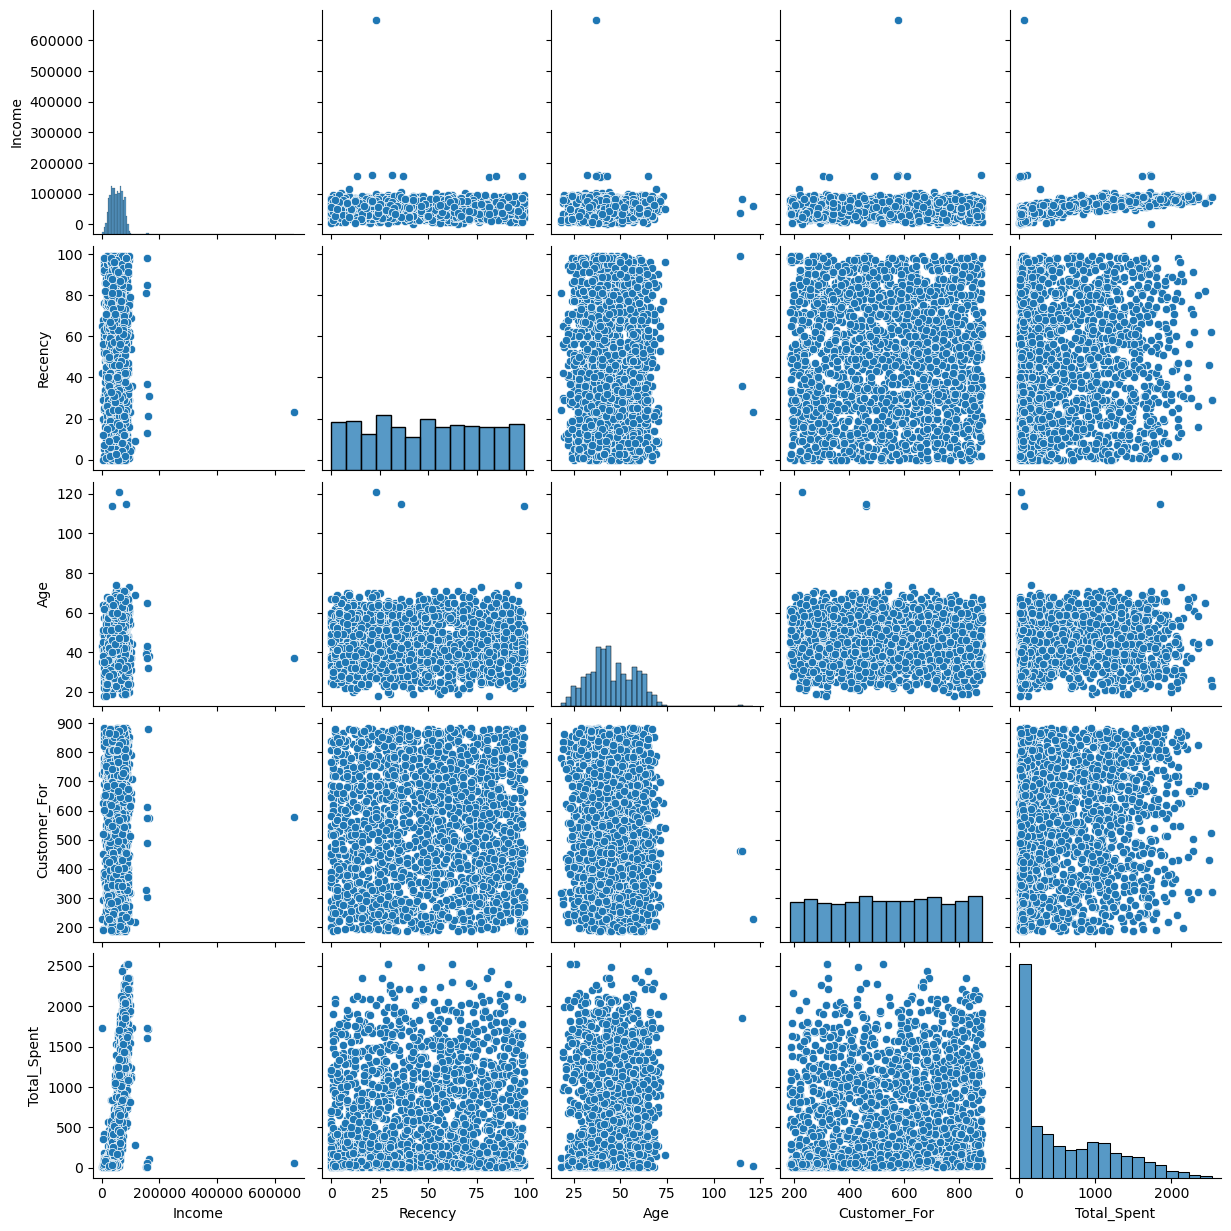

In [65]:
# Select columns to plot
selected_columns = campaign_data[["Income", "Recency", "Age", "Customer_For", "Total_Spent"]]
 
# Create a pairplot using Seaborn with a visually appealing color palette
sns.pairplot(selected_columns)
 
# Display the plot using matplotlib.pyplot
plt.show()

It is clear now that you have outliers in Age and Income features. Remove them.

Remove outliers

In [66]:
# Dropping the outliers by setting a cap on Age and income. 
campaign_data = campaign_data[(campaign_data["Age"]<100)]
campaign_data = campaign_data[(campaign_data["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(campaign_data))

The total number of data-points after removing the outliers are: 2212


#### 3. Data preprocessing

Define the features to use for clustering - Drop non-numeric columns

In [67]:
numeric_campaign_data = campaign_data.select_dtypes(include=np.number)

Drop columns that were summarized during the Feature Engineering step.

In [68]:
to_drop1 = ['Promo1', 'Promo2', 'Promo3', 'Promo4', 'Promo5', 'Promo6', 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store']
numeric_campaign_data = numeric_campaign_data.drop(to_drop1, axis=1)

We calculate the top features affecting the number of accepted promotions

In [70]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
 
X = numeric_campaign_data.drop('Offers_Accepted', axis=1)
y = numeric_campaign_data['Offers_Accepted']
 
num_top_features = 5
selector = SelectKBest(mutual_info_classif, k=num_top_features)
selector.fit(X, y)
 
selected_features = X.columns[selector.get_support()]
print(f"Top {num_top_features} features based on mutual information:")
print(selected_features)

Top 5 features based on mutual information:
Index(['Income', 'WebConversionRate', 'Total_Spent', 'Total_Purchases',
       'Dependents'],
      dtype='object')


Select features for scaling

In [71]:
campaign_data_scale = numeric_campaign_data[['Income', 'Total_Purchases', 'WebConversionRate', 'Total_Spent', 'Offers_Accepted']]

Scale the data

Visualize the distribution of each feature

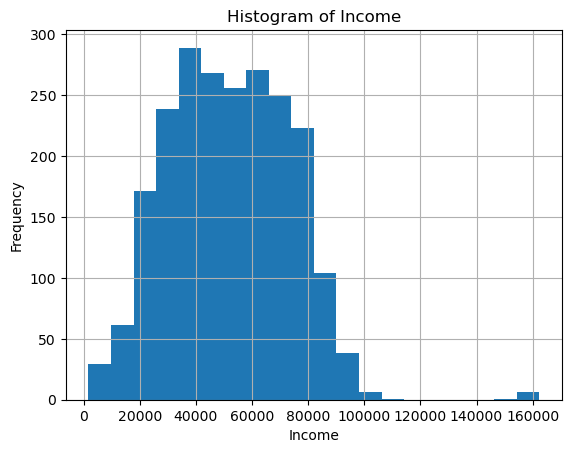

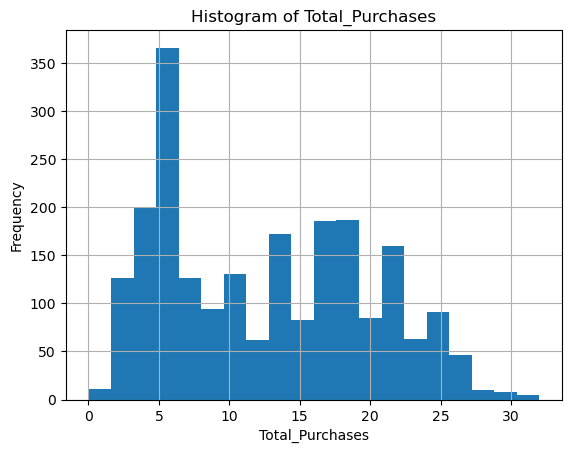

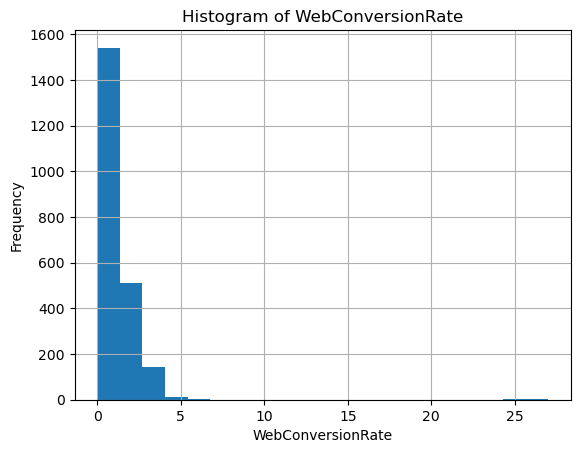

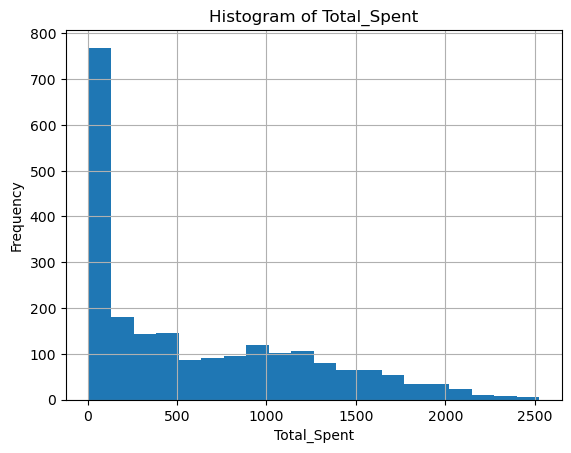

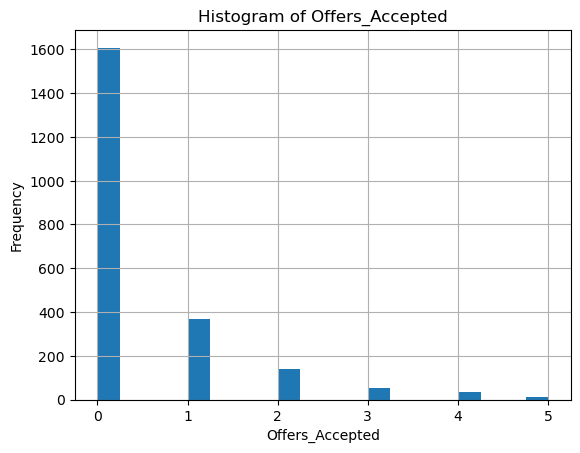

In [74]:
for column in campaign_data_scale.columns:
    plt.figure()
    campaign_data_scale[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Create lists of Gaussian and non-Gaussian features

In [75]:
gaussian_features = ['Income']
non_gaussian_features = ['Total_Purchases', 'Total_Spent', 'Offers_Accepted', 'WebConversionRate']

Create transformers

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
preprocessor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), gaussian_features),
        ('minmax_scaler', MinMaxScaler(), non_gaussian_features)
    ], remainder='passthrough')

Fit and transform the numerical data

In [78]:
campaign_data_scaled = preprocessor.fit_transform(campaign_data_scale)

 Convert the scaled_numeric_data array to a DataFrame

In [79]:
campaign_data_scaled = pd.DataFrame(campaign_data_scaled, columns=gaussian_features + non_gaussian_features)

Check the results

In [80]:
campaign_data_scaled.describe()

,Income,Total_Purchases,Total_Spent,Offers_Accepted,WebConversionRate
count,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000
mean,-1.146141e-16,0.392716,0.238995,0.089783,0.039896
std,1.000226e+00,0.225170,0.239093,0.178603,0.044875
min,-2.333791e+00,0.000000,0.000000,0.000000,0.000000
25%,-7.771113e-01,0.187500,0.025397,0.000000,0.012346
50%,-2.731156e-02,0.375000,0.155556,0.000000,0.027778
75%,7.679525e-01,0.570312,0.413889,0.200000,0.055556
max,5.131311e+00,1.000000,1.000000,1.000000,1.000000


#### 4. Clustering

Installing required packages.

pip install yellowbrick

In [81]:
# Now we need to import KElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer

Finding the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


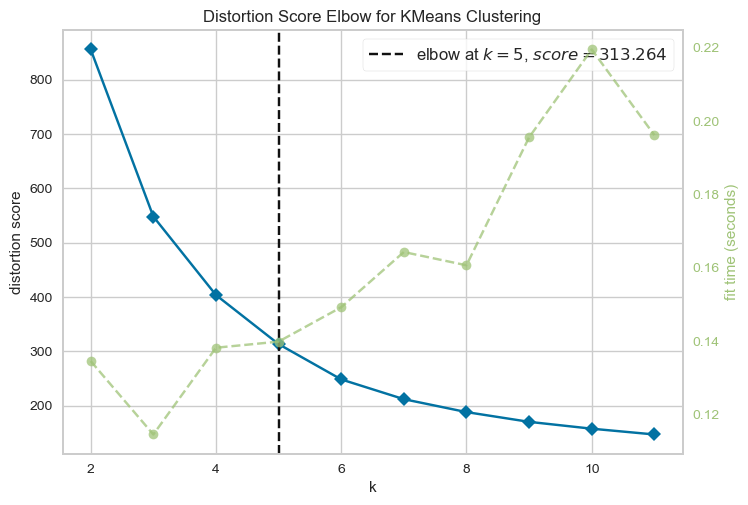

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# Quick examination of elbow method to find the number of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(campaign_data_scaled)
Elbow_M.show()

Clustering using the K-means algorithm

we'll perform clustering using the K-means algorithm

In [83]:
# Number of clusters
num_clusters = 5
 
# Set a seed for reproducibility
random_seed = 18
 
# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed)
 
# Fit the model to the data
kmeans.fit(campaign_data_scaled)
 
# Get the cluster assignments for each data point
clusters = kmeans.predict(campaign_data_scaled)

 Add the cluster assignments as a new column in the original dataframe

In [86]:
# Add the cluster assignments as a new column in the original dataframe
campaign_data["cluster"] = clusters

# Save dataframe as csv
path = 'C:/Portfolio/clustering/Data/data_clustered.csv'
campaign_data.to_csv(path, index=False)